In [3]:
import pynbody

import pylab

# load test data
s = pynbody.load('testdata/g15784.lr.01024.gz')

In [4]:
h = s.halos()

In [38]:
# define halo one 

h1 = h[1]

In [6]:
# print info about the snapshot
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(h1.gas),len(h1.dark),len(h1.star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05



In [7]:
# center the snapshot, specifically onto halo 1. Do this using the hybdrid method.
# First find the lowest potenial and then do the shrinking sphere method.
pynbody.analysis.halo.center(h1,mode='hyb')

In [8]:
# Print position of halo 1 in arbitrary units
print(h[1]['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]


In [9]:
# Print position of halo 5 in arbitrary units

print(h[5]['pos'][0])


[-0.00092652  0.00130131 -0.00042332]


In [10]:
# define varaible for halo 5 
h5 = h[5]

In [11]:
# Perform a transformation so that the snapshot of the simulation is centered on halo 5. 
# move_all = False means don't move the other halos, such as halo 1. 

my_h5_transform = pynbody.analysis.halo.center(h5, mode='hyb', move_all=False)

In [12]:
print(h[1]['pos'][0]) # should be unchanged. Yay! it's not

[-0.00091396 -0.00044043 -0.00365958]


In [13]:
print(h5['pos'][0]) # should be changed. It did!

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [14]:
# Revert transformation 
my_h5_transform.revert()

In [15]:
# check that it reverted and check that halo 1 is unchanged
print(h[1]['pos'][0]) 
print(h5['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]
[-0.00092652  0.00130131 -0.00042332]


In [25]:
# reload the file and redefine halo one 
s = pynbody.load('testdata/g15784.lr.01024.gz'); h1 = s.halos()[1];

# centered using the hybrid approuch 
cen_hyb = pynbody.analysis.halo.center(h1,mode='hyb',retcen=True)
# centered using the lowest potenential
cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)

In [17]:
# compare which one is better
print(cen_hyb)

print(cen_pot)

[ 0.02445621 -0.03411364 -0.12243623]
[ 0.02445719 -0.03411397 -0.12243643]


In [18]:
# this sets the hybrid as the preferred centering approuch.
s['pos'] -= cen_hyb # Subtract AND means s['pos'] = s['pos'] - cen_hyb

SimArray([[11656183., 11705899., 11755616., ..., 25214932., 24284320.,
           23353712.],
          [11775070., 11846357., 11917645., ..., 25279874., 24385336.,
           23490800.],
          [11893956., 11986816., 12079674., ..., 25344818., 24486350.,
           23627886.],
          ...,
          [14668327., 15446927., 16225526., ..., 20839576., 20571524.,
           20303472.],
          [14693299., 15466383., 16239470., ..., 21214600., 21019964.,
           20825330.],
          [14718271., 15485841., 16253412., ..., 21589620., 21468404.,
           21347188.]], dtype=float32, 'Msol kpc**-3')

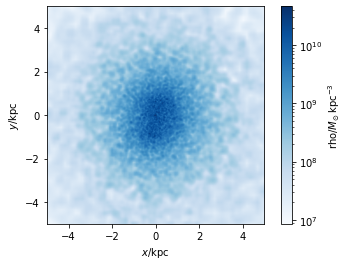

In [23]:
# Turns all values into physical units e.g. kpc, Msol...

s.physical_units()

# Plot the gas of halo 1 with a width of 100 kpc in the x and y. Set the density color to blue.
pynbody.plot.image(h1.s, width=10, cmap='Blues')

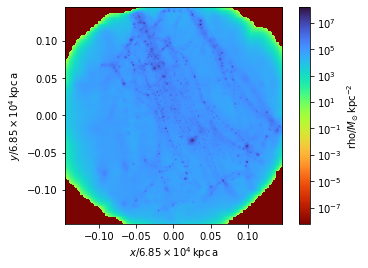

In [34]:
# plot the dark matter of the simulation snapshot within 10 MPC in both x and y. The surface density is mapped in greys 
# I have to say the turbo and turbo_r color scheme is really cool. 
# So I tried the other filters Cuboid, HighPas, and Disk but they were having issues
# I'm guessing the low density areas are the edges of the simulation
pynbody.plot.image(s.d[pynbody.filt.Sphere('10 Mpc')], width='20 Mpc', units = 'Msol kpc^-2', cmap='turbo_r');

In [46]:
# analyze the angular momementum of halo 1 centered at 0,0,0. 
pynbody.analysis.angmom.sideon(h1, cen=(0,0,0))

# plot the gas of halo one with a width of 100 kpc in both x and y. With turbo_r color scheme
# for the gas density
pynbody.plot.image(h1.d, width=100, cmap='turbo_r');

Exception in thread Thread-165:
Traceback (most recent call last):
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/sph/__init__.py", line 440, in bridge
    X = fn(*args[1:], **kwargs)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/sph/__init__.py", line 422, in render_fn
    base = fn(*args, **kwargs)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/sph/__init__.py", line 572, in _render_image
    snap_proxy[arname] = snap[arname]
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/__init__.py", line 264, in __getitem__
    return self._get_array_with_lazy_actions(i)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/p

Exception in thread Thread-169:
Traceback (most recent call last):
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/sph/__init__.py", line 440, in bridge
    X = fn(*args[1:], **kwargs)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/sph/__init__.py", line 422, in render_fn
    base = fn(*args, **kwargs)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/sph/__init__.py", line 572, in _render_image
    snap_proxy[arname] = snap[arname]
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/snapshot/__init__.py", line 264, in __getitem__
    return self._get_array_with_lazy_actions(i)
  File "/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/p

RuntimeError: There was a problem with the multi-threaded image render. Try running again with threaded=False to debug the underlying error.

In [43]:
# Rotate the snapshot by 90 degrees
s.rotate_x(90)

/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]
<ipython-input-44-48c4c5135cf5>:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  pylab.semilogy();
/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


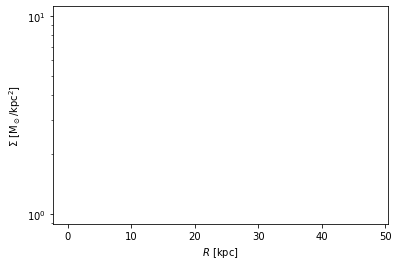

In [44]:
# Analyze the stars of halo one with an x range of 0.01 to 50kpc and set the y axis values to log
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 50, type = 'log')

# clear figure... I think
pylab.clf()

# plot the radius vs density of stars of halo one
pylab.plot(ps['rbins'], ps['density']);

# set the y-axis to semi log
pylab.semilogy();

pylab.xlabel('$R$ [kpc]');

pylab.ylabel('$\Sigma$ [M$_\odot$/kpc$^2$]');

In [41]:
# Create a figure
pylab.figure()

# Do analysis of the dark matter profile of halo one in the radius range of 0.01 to 50kpc
pd = pynbody.analysis.profile.Profile(h1.d,min=.01,max=50, type = 'log')

# Do analysis of the gas profile of halo one in the radius range of 0.01 to 50kpc
pg = pynbody.analysis.profile.Profile(h1.g,min=.01,max=50, type = 'log')

# Do analysis of the total profile of halo one in the radius range of 0.01 to 50kpc
p = pynbody.analysis.profile.Profile(h1,min=.01,max=50, type = 'log')

# A for loop created to plot the total, dark matter, stars, and gas velocity profile vs radius 
# all one graph. I'm guessing you can do subplots as well. 
for prof, name in zip([p,pd,ps,pg],['total','dm','stars','gas']) : pylab.plot(prof['rbins'],prof['v_circ'],label=name)

pylab.xlabel('$R$ [kpc]');

pylab.ylabel('$v_{circ}$ [km/s]');

pylab.legend()

/Users/tjgehrman/opt/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


NameError: name 'ps' is not defined

<Figure size 432x288 with 0 Axes>